# <center> Neural Network

## Problem statement: 
### Predicting turbine energy yield (TEY) using ambient variables as features, with the help of Neural network.

### Import libraries

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.keras
import tensorflow
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

### Reading the input csv file

In [8]:
data = pd.read_csv("gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


### Checking for the null values and the data types of the features

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


### Check for duplicate values in the input data file

In [9]:
data[data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


### Cheking the normal distribution of the data using distplot

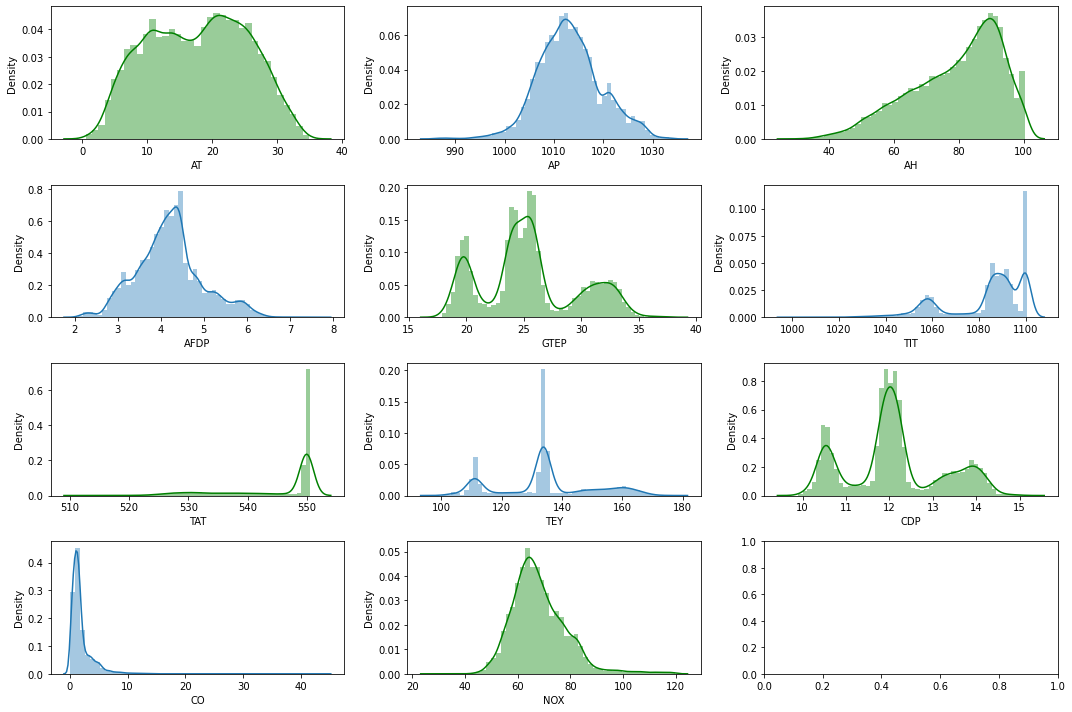

In [10]:
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.distplot(data.AT, ax=ax[0,0],color='g')
sns.distplot(data.AP, ax=ax[0,1])
sns.distplot(data.AH, ax=ax[0,2],color='g')
sns.distplot(data.AFDP, ax=ax[1,0])
sns.distplot(data.GTEP, ax=ax[1,1],color='g')
sns.distplot(data.TIT, ax=ax[1,2])
sns.distplot(data.TAT, ax=ax[2,0],color='g')
sns.distplot(data.TEY, ax=ax[2,1])
sns.distplot(data.CDP, ax=ax[2,2],color='g')
sns.distplot(data.CO, ax=ax[3,0])
sns.distplot(data.NOX, ax=ax[3,1],color='g')

plt.tight_layout()
plt.show()

### Check for outliers in the dataset, using boxplot

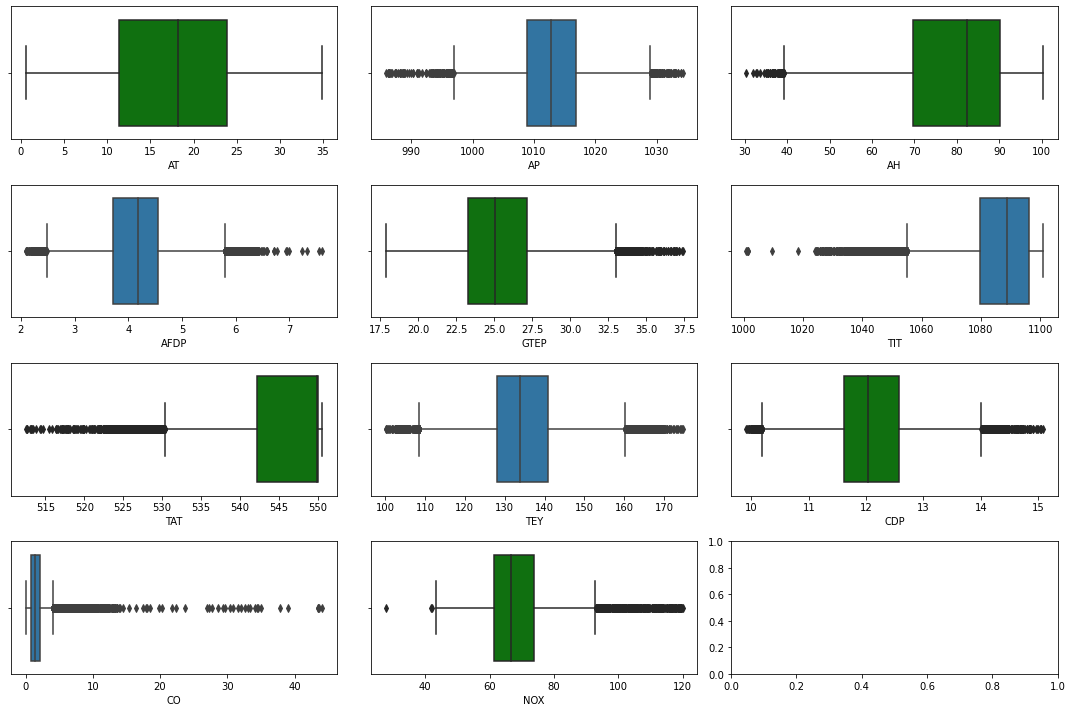

In [11]:
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.boxplot(data.AT, ax=ax[0,0],color='g')
sns.boxplot(data.AP, ax=ax[0,1])
sns.boxplot(data.AH, ax=ax[0,2],color='g')
sns.boxplot(data.AFDP, ax=ax[1,0])
sns.boxplot(data.GTEP, ax=ax[1,1],color='g')
sns.boxplot(data.TIT, ax=ax[1,2])
sns.boxplot(data.TAT, ax=ax[2,0],color='g')
sns.boxplot(data.TEY, ax=ax[2,1])
sns.boxplot(data.CDP, ax=ax[2,2],color='g')
sns.boxplot(data.CO, ax=ax[3,0])
sns.boxplot(data.NOX, ax=ax[3,1],color='g')

plt.tight_layout()
plt.show()

### Normalising the data using a mixmax scaler library 

In [12]:
scale=MinMaxScaler()
data1=pd.DataFrame(scale.fit_transform(data),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX'])
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


### Extracting the independent and dependent variables, from the dataset

In [13]:
X = data1.drop(axis=0,columns="TEY").values
Y = data1["TEY"].values

In [14]:
X

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [15]:
Y

array([0.19519076, 0.19545943, 0.19532509, ..., 0.13460505, 0.14199355,
       0.15327781])

### Fixing a random seed for ensuring that the algorithm produces the same accuracy by selecting a similar sample, everytime, it runs the code

In [16]:
seed = 7
np.random.seed(seed)

### Constructing a Sequential neural network with 12 neurons in the first input layer, 8 neurons in the hidden layer and 1 neuron in the output layer

In [12]:
model = Sequential()
model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

### Compiling the model and using Mean squared error as the loss function and adam as the weight optimizer

In [13]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

### Fitting the model

In [14]:
model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 48s 6ms/step - loss: 0.0215 - accuracy: 7.2279e-06 - val_loss: 8.8233e-04 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 4s 4ms/step - loss: 6.2271e-04 - accuracy: 1.6069e-04 - val_loss: 6.0863e-04 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 4s 4ms/step - loss: 4.3687e-04 - accuracy: 3.9232e-05 - val_loss: 5.4276e-04 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 4s 4ms/step - loss: 3.6223e-04 - accuracy: 4.1389e-04 - val_loss: 4.0367e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 4s 4ms/step - loss: 3.2258e-04 - accuracy: 1.1371e-04 - val_loss: 2.6489e-04 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 4s 4ms/step - loss: 2.9267e-04 - accuracy: 9.3628e-06 - val_loss: 3.3536e-04 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 [==============

### Evaluation of the model

In [15]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 0s 773us/step - loss: 1.6572e-04 - accuracy: 1.3299e-040s - loss: 1.4047e-04 - accuracy: 
accuracy: 0.01%


In [16]:
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.8192e-04 - accuracy: 9.9246e-05 - val_loss: 1.6591e-04 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.8233e-04 - accuracy: 9.9246e-05 - val_loss: 1.6701e-04 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.8227e-04 - accuracy: 9.9246e-05 - val_loss: 1.6944e-04 - val_accuracy: 2.0149e-04s: 1.8286e-04 - accuracy: 1.
Epoch 4/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.7978e-04 - accuracy: 9.9246e-05 - val_loss: 1.7253e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.8355e-04 - accuracy: 9.9246e-05 - val_loss: 2.2616e-04 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.8289e-04 - accuracy: 9.9246e-05 - val_loss: 1.3949e-04 - val_accuracy: 2.0149e-04
Epoch 

### List all the evaulation metric in built model (history)

In [17]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Visualising the model history for train and test accuracy

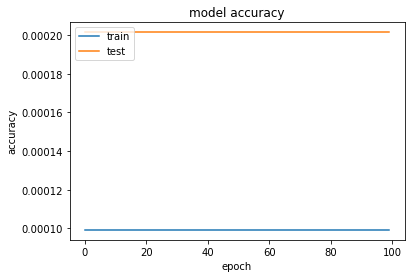

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Visualising the model history for the train and test loss

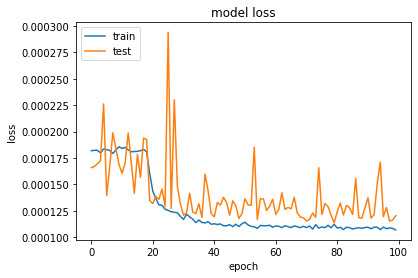

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Tuning the Hyperparameters :-  Batch Size and Epochs

### Creating a user defined function, that has the neural network model and compiles the model with the loss function and weight optimizers

In [20]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
    return model

### Using Gridsearch CV, to find the best parameters, that contributes to higher accuracy of Regression, by passing in the user defined model function

In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0)
batch_size = [10,20,40]
epochs = [10,50,100]
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ..................batch_size=10, epochs=10; total time=   9.8s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ..................batch_size=10, epochs=10; total time=   9.7s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ..................batch_size=10, epochs=10; total time=  10.0s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ..................batch_size=10, epochs=10; total time=   9.9s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ..................batch_size=10, epochs=10; total time=   9.5s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ..................batch_size=10

### Conclusion:


### The neural network helps predicting the turbine energy yield (TEY) using ambient variables as features, with the validation loss of 1.4047e-04, while evaluating the model.

### Since, this is a regression problem, our evaluation metric is MSE, thus, our aim is to reduce the MSE value between the original and the predicted.